# 数据处理
## 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

原始数据集

In [2]:
#data
data_train=pd.read_csv('C:/Users/hjs34/Documents/kaggle/flight_delays/flight_delays_train.csv')
data_test=pd.read_csv('C:/Users/hjs34/Documents/kaggle/flight_delays/flight_delays_test.csv')
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


## 修改数据

In [4]:
data_train['Month'] = data_train['Month'].str[2:].astype('int')
data_train['DayofMonth'] = data_train['DayofMonth'].str[2:].astype('int')
data_train['DayOfWeek'] = data_train['DayOfWeek'].str[2:].astype('int')

data_test['Month'] = data_test['Month'].str[2:].astype('int')
data_test['DayofMonth'] = data_test['DayofMonth'].str[2:].astype('int')
data_test['DayOfWeek'] = data_test['DayOfWeek'].str[2:].astype('int')

In [5]:
target_dict={'N':0,'Y':1}

data_train['dep_delayed_15min']=data_train['dep_delayed_15min'].map(target_dict)

In [6]:
data_train['DepTime_hour']=data_train['DepTime']//100
data_train['DepTime_min']=data_train['DepTime']%100

data_test['DepTime_hour']=data_test['DepTime']//100
data_test['DepTime_min']=data_test['DepTime']%100

def hour_to_mae(x):
    if (x>6) & (x<12):
        return 'Morning'
    elif (x>12) & (x<18):
        return 'Afternoon'
    else:
        return 'Night'

data_train['mae']=data_train['DepTime_hour'].map(hour_to_mae)
data_test['mae']=data_test['DepTime_hour'].map(hour_to_mae)

In [7]:
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,mae
0,8,21,7,1934,AA,ATL,DFW,732,0,19,34,Night
1,4,20,3,1548,US,PIT,MCO,834,0,15,48,Afternoon
2,9,2,5,1422,XE,RDU,CLE,416,0,14,22,Afternoon
3,11,25,6,1015,OO,DEN,MEM,872,0,10,15,Morning
4,10,7,6,1828,WN,MDW,OMA,423,1,18,28,Night


## 展示各项特征的分布

Text(0, 0.5, 'Distance')

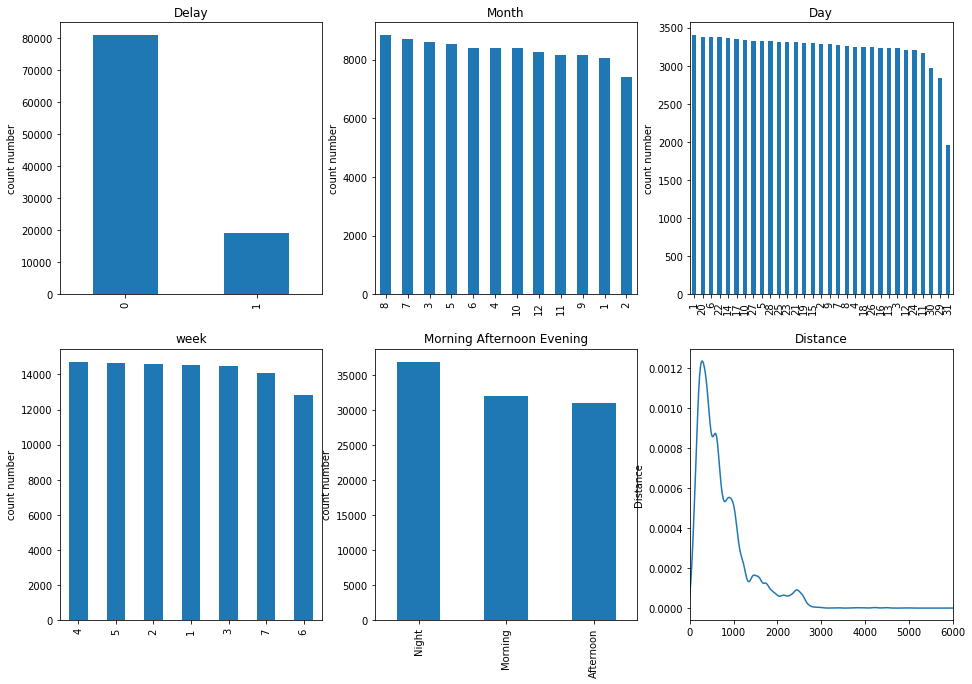

In [8]:
fig = plt.figure(figsize=(16,11))
fig.set(alpha=0.2) 

plt.subplot2grid((2,3),(0,0))   
data_train.dep_delayed_15min.value_counts().plot(kind='bar')
plt.title('Delay')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,1))   
data_train.Month.value_counts().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,2))   
data_train.DayofMonth.value_counts().plot(kind='bar')
plt.title('Day')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,1))   
data_train.mae.value_counts().plot(kind='bar')
plt.title('Morning Afternoon Evening')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,2))   
data_train.Distance.plot(kind='kde',xlim=[0,6000])
plt.title('Distance')
plt.ylabel('Distance') 

## 观察各个特征和延误的大致关系

### 月份

<Figure size 576x576 with 0 Axes>

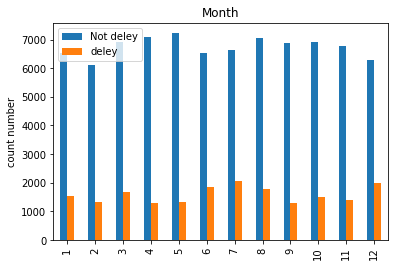

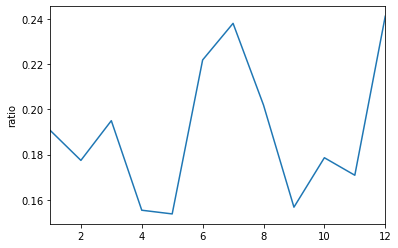

In [9]:
#月份
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_month={}
for month in range(1,13):
    deley_month[month]=data_train.dep_delayed_15min[data_train.Month==month].value_counts()

deley_month=pd.DataFrame(deley_month)

deley_month.transpose().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_month=deley_month.loc[1]/deley_month.sum()
plt.ylabel('ratio')
rate_month.plot()

### 天数

<Figure size 576x576 with 0 Axes>

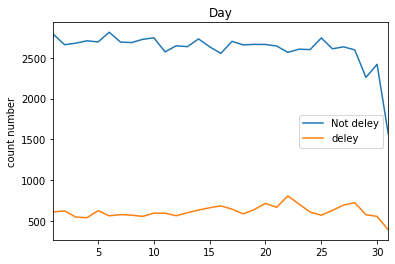

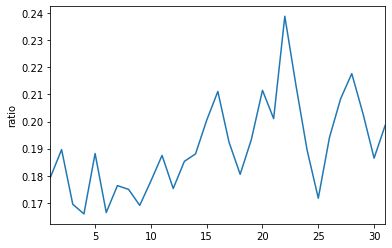

In [10]:
#天数
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_day={}
for day in range(1,32):
    deley_day[day]=data_train.dep_delayed_15min[data_train.DayofMonth==day].value_counts()

deley_day=pd.DataFrame(deley_day)

deley_day.transpose().plot(kind='line')
plt.title('Day')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_day=deley_day.loc[1]/deley_day.sum()
plt.ylabel("ratio")
rate_day.plot()

### week

<Figure size 576x576 with 0 Axes>

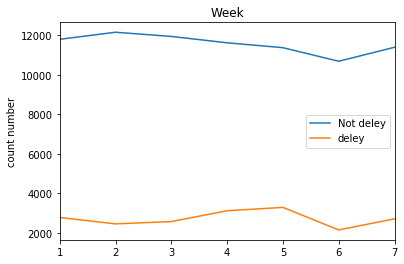

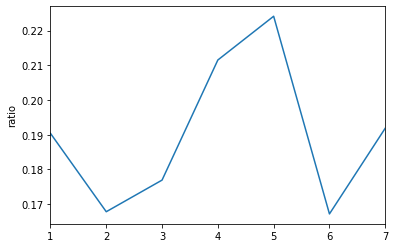

In [11]:
#week
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_week={}
for week in range(1,8):
    deley_week[week]=data_train.dep_delayed_15min[data_train.DayOfWeek==week].value_counts()

deley_week=pd.DataFrame(deley_week)

deley_week.transpose().plot(kind='line')
plt.title('Week')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_week=deley_week.loc[1]/deley_week.sum()
plt.ylabel("ratio")
rate_week.plot()

### ame

<Figure size 576x576 with 0 Axes>

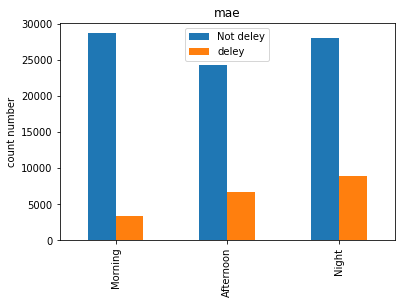

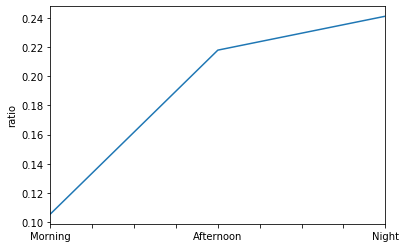

In [12]:
#mae
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_mae={}
for mae in ['Morning','Afternoon','Night']:
    deley_mae[mae]=data_train.dep_delayed_15min[data_train.mae==mae].value_counts()

deley_mae=pd.DataFrame(deley_mae)

deley_mae.transpose().plot(kind='bar')
plt.title('mae')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_mae=deley_mae.loc[1]/deley_mae.sum()
plt.ylabel('ratio')
rate_mae.plot()

### 距离

,deley,not deley
count,19044.000000,80956.000000
mean,726.157740,730.159198
std,544.388349,581.500132
min,30.000000,31.000000
25%,328.000000,316.000000
50%,589.000000,569.000000
75%,954.000000,957.000000
max,4962.000000,4962.000000


<Figure size 576x576 with 0 Axes>

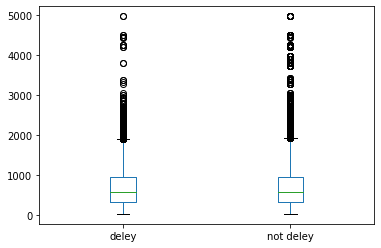

In [13]:
#距离
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 

distance_deley=data_train.Distance[data_train.dep_delayed_15min==1]
distance_notdeley=data_train.Distance[data_train.dep_delayed_15min==0]

dis=pd.DataFrame({'deley':distance_deley,'not deley':distance_notdeley})
dis.plot(kind='box')
dis.describe()

## 因子化

In [14]:
dummies_mae=pd.get_dummies(data_train['mae'],prefix='mae')
dummies_Origin=pd.get_dummies(data_train['Origin'],prefix='Origin')
dummies_Dest=pd.get_dummies(data_train['Dest'],prefix='Dest')
dummies_UniqueCarrier=pd.get_dummies(data_train['UniqueCarrier'],prefix='UniqueCarrier')

dummies_mae_test=pd.get_dummies(data_test['mae'],prefix='mae')
dummies_Origin_test=pd.get_dummies(data_test['Origin'],prefix='Origin')
dummies_Dest_test=pd.get_dummies(data_test['Dest'],prefix='Dest')
dummies_UniqueCarrier_test=pd.get_dummies(data_test['UniqueCarrier'],prefix='UniqueCarrier')


data_train_new=pd.concat([data_train,dummies_mae,dummies_Origin,dummies_Dest,dummies_UniqueCarrier],axis=1)
data_train_new.drop(['mae'],inplace=True,axis=1)

data_test_new=pd.concat([data_test,dummies_mae_test,dummies_Origin_test,dummies_Dest_test,dummies_UniqueCarrier_test],axis=1)
data_test_new.drop(['mae'],inplace=True,axis=1)

data_train_new.head()

## data_train_new是只除掉mae的最完整数据集

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,...,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TZ,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,8,21,7,1934,AA,ATL,DFW,732,0,19,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,US,PIT,MCO,834,0,15,...,0,0,0,0,0,0,1,0,0,0
2,9,2,5,1422,XE,RDU,CLE,416,0,14,...,0,0,0,0,0,0,0,0,1,0
3,11,25,6,1015,OO,DEN,MEM,872,0,10,...,0,0,0,1,0,0,0,0,0,0
4,10,7,6,1828,WN,MDW,OMA,423,1,18,...,0,0,0,0,0,0,0,1,0,0


# 初步拟合

In [15]:
from sklearn import tree
data_1 = data_train_new.filter(regex='mae_.*|Origin_.*|Dest_.*|UniqueCarrier_.*|Month|DayofMonth|DayOfWeek|DepTime_*')
target=data_train['dep_delayed_15min']
clf = tree.DecisionTreeClassifier(max_depth=32)
clf = clf.fit(data_1, target)
y_self=clf.predict(data_1)
sum(y_self==target)/len(target)

0.92909

# 预测
## 对测试集变形，预测并保存

In [16]:
test_1 = data_test_new.filter(regex='mae_.*|Origin_.*|Dest_.*|UniqueCarrier_.*|Month|DayofMonth|DayOfWeek|DepTime_*')
data_1.cn=data_1.columns.values.tolist()
test_1.cn=test_1.columns.values.tolist()
ex_test=list(set(test_1.cn).difference(set(data_1.cn)))
less_text=list(set(data_1.cn).difference(set(test_1.cn)))
test_1.drop(ex_test,axis=1,inplace=True)
for ls in less_text:
    test_1[ls]=0
y_predict_1=clf.predict_proba(test_1)
id_test=list(range(100000))
result = pd.DataFrame({'id':id_test,'dep_delayed_15min':y_predict_1[:,1]})
result.to_csv("C:\\Users\\hjs34\\Documents\\kaggle\\flight_delays\\flight_delays_predictions.csv", index=False)


C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hjs34\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\hjs34\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

**初步决策树预测结果：0.61391**

# 优化
## 修改变量

In [23]:
airport=pd.read_csv('airport_nonull.csv')
airport.info()
airport.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 18 columns):
id                   9120 non-null int64
ident                9120 non-null object
type                 9120 non-null object
name                 9120 non-null object
latitude_deg         9120 non-null float64
longitude_deg        9120 non-null float64
elevation_ft         8771 non-null float64
continent            6139 non-null object
iso_country          9089 non-null object
iso_region           9120 non-null object
municipality         8361 non-null object
scheduled_service    9120 non-null object
gps_code             8483 non-null object
iata_code            9120 non-null object
local_code           3010 non-null object
home_link            1659 non-null object
wikipedia_link       6402 non-null object
keywords             2111 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 1.3+ MB


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,4650,03N,small_airport,Utirik Airport,11.222000,169.852005,4.0,OC,MH,MH-UTI,Utirik Island,yes,K03N,UTK,03N,NaN,https://en.wikipedia.org/wiki/Utirik_Airport,NaN
1,6924,07FA,small_airport,Ocean Reef Club Airport,25.325399,-80.274803,8.0,NaN,US,US-FL,Key Largo,no,07FA,OCA,07FA,https://www.oceanreef.com/community/private-ai...,https://en.wikipedia.org/wiki/Ocean_Reef_Club_...,NaN
2,7063,0AK,small_airport,Pilot Station Airport,61.934601,-162.899994,305.0,NaN,US,US-AK,Pilot Station,yes,NaN,PQS,0AK,NaN,https://en.wikipedia.org/wiki/Pilot_Station_Ai...,NaN
3,7139,0CO2,small_airport,Crested Butte Airpark,38.851918,-106.928341,8980.0,NaN,US,US-CO,Crested Butte,no,0CO2,CSE,0CO2,NaN,NaN,Buckhorn Ranch
4,7545,0TE7,small_airport,LBJ Ranch Airport,30.251801,-98.622498,1515.0,NaN,US,US-TX,Johnson City,no,0TE7,JCY,0TE7,NaN,NaN,NaN


In [26]:
#所有出现过的机场
place=set(data_test['Dest'].values)|set(data_train['Dest'].values)|set(data_test['Origin'].values)|set(data_train['Origin'].values)
#建立转换字典
place2type={airport.iata_code.values[i]:airport.type.values[i] for i in range(9120) if airport.iata_code.values[i] in place}

In [30]:
data_train_new['Dest_type']=data_train_new['Dest'].map(place2type)
data_train_new['Origin_type']=data_train_new['Origin'].map(place2type)

data_test_new['Dest_type']=data_test_new['Dest'].map(place2type)
data_test_new['Origin_type']=data_test_new['Origin'].map(place2type)

**还是普通决策树，但是试一下很少的变量，把目的地起始地全部换成机场的type**

count             99959
unique                3
top       large_airport
freq              91891
Name: Dest_type, dtype: object

In [ ]:
a